# Luminosity Function - Nico Keeghan

Now that we have the distance to NGC 3293 and determined which stars probably aren't from the cluster, we can determine the luminosity function of NGC 3293. We can do this using the magnitude-luminosity relation.

We will start by importing the relevant libraries.

In [1]:
import numpy as np
import astropy
from astropy import units as u
import matplotlib.pyplot as plt 

Now we will read in our magnitudes.

In [2]:
from astropy.table import QTable

mags = QTable.read("obj_magnitudes.ecsv", format='ascii.ecsv')

Now we will exclude the stars that we have identified as not being in our cluster. We start by reading in the file of removed ids. These are the ids in `mags` for which we have decided to exclude the stars.

In [3]:
import csv
removed_ids = []
with open('removed_ids.dat') as f:
    reader = csv.reader(f,delimiter='\n')
    for row in reader:
        row = row[0].strip(' ').strip(',')
        if row.isnumeric():
            removed_ids.append(int(row))

Now we filter our v-band magnitudes. We will use the extinction, reddening, and offset we used in the `isochrones.ipynb` file. From the isochrone offset, we have that $m = M + 11.8$. As such, $M = m - 11.8$. We can use this to determine the V-band magnitudes.

In [4]:
extinction = 1
reddening = extinction/3.1
offset = 11.8

Mv_filtered = [mags['Vmag'][i] - extinction - offset for i in range(len(mags['id'])) if (mags['id'][i] not in removed_ids)]

Now we will plot the number of stars as a function of V-band absolute magnitude.

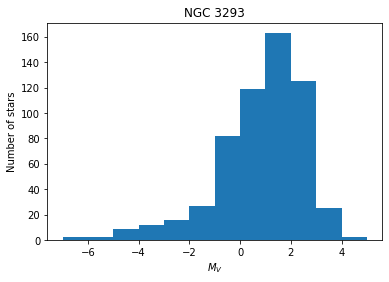

In [5]:
bins = [i for i in range(int(min(Mv_filtered))-1,int(max(Mv_filtered))+2)]

plt.title('NGC 3293')
num, bins, patch = plt.hist(Mv_filtered, bins=bins)
plt.ylabel('Number of stars')
plt.xlabel('$M_V$')
plt.show()

***Figure 1.*** Histogram of the stars in NGC 3293 as a function of V-band absolute magnitude. There is a peak of stars with V-band absolute magnitudes between 1 and 2 mag. The brightest star detected has a V-band absolute magnitude of -6.3 mag, while the dimmest has a V-band absolute magnitude of 4.5 mag.

In [6]:
print('Bins:', bins)
print('Stars per bin:', num)

print('')
print('Brightest Mv:',min(Mv_filtered))
print('Dimmest Mv:',max(Mv_filtered))

peak_bin_idx = np.argmax(num)
print('Peak Mv:', (bins[peak_bin_idx], bins[peak_bin_idx+1]))

Bins: [-7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
Stars per bin: [  2.   2.   9.  12.  16.  27.  82. 119. 163. 125.  25.   2.]

Brightest Mv: -6.339429688801118
Dimmest Mv: 4.536910612597435
Peak Mv: (1, 2)


The brightest V-band magnitude star that we find has $M_V = -6.34$. Dufton et al (2006) (DOI:10.1051/0004-6361:20065392) found 2 blue supergiants of spectral type B0 in NGC 3293. According to Appendix G of Carroll and Ostlie, blue supergiants have V-band absolute magnitudes larger than $M_V=-6.3$ mag, and up to as bright as $M_V=-6.9$ mag. As such, it is reassuring that we have found two stars with $M_V$ in the range $-6$ to $-7$ mag. The brightest star that we found had $M_V = -6.3$, which is perhaps a little dimmer than expected. This could be due to dust extinction being overestimated, or the distance being overestimated.

The dimmest star that we observe has a V-band absolute magnitude of $4.5$ mag. The Sun has a V-band absolute magnitude of $4.8$ mag, so this is slightly brighter than the Sun.

The largest number of stars is found in the $1-2$ mag bin. This corresponds to main sequence stars of type A. This peak is likely not a natural peak, as the dropoff in stars at lower luminosities is likely due to reaching the detection threshold of the telescope as opposed to a physical absence of these stars.

Since $M_V = M_\odot -2.5\log \frac{L}{L_\odot}$, we have
$$L = L_\odot 10^{(M_\odot-M_V)/2.5}.$$

We can use this to examine the luminosities of the stars in NGC 3293. We will assume that the Sun has a V-band absolute magnitude of 4.81 mag, following Willmer (2018) (DOI = 10.3847/1538-4365/aabfdf).

In [7]:
Mv_filtered = np.array(Mv_filtered)
L = 10**((4.81-Mv_filtered)/2.5)

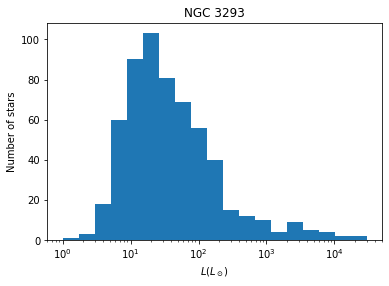

In [8]:
bins = np.logspace(np.log10(1),np.log10(30000),20)

plt.title('NGC 3293')
num, bins, patch = plt.hist(L,bins)
plt.ylabel('Number of stars')
plt.xlabel('$L (L_\odot)$')
plt.xscale('log')
plt.show()

***Figure 2.*** Histogram of number of stars detected in NGC 3293 as a function of luminosity. On the right side of the peak, the number of stars decreases as luminosity increases, as we would expect. On the left of the peak, the number of stars increases with luminosity. This is likely a selection effect, as we are much more likely to observe the bright stars than the dim stars.

In [9]:
print('Bins:', ['%.3f' % b for b in bins])
print('Stars per bin:', num)

print('Brightest star:',max(L),'Lsun')
print('Dimmest star:',min(L),'Lsun')

peak_bin_idx = np.argmax(num)
print(peak_bin_idx)
print('Peak L:', (bins[peak_bin_idx], bins[peak_bin_idx+1]))

Bins: ['1.000', '1.720', '2.960', '5.092', '8.761', '15.073', '25.932', '44.613', '76.754', '132.051', '227.185', '390.857', '672.443', '1156.894', '1990.359', '3424.281', '5891.249', '10135.504', '17437.463', '30000.000']
Stars per bin: [  1.   3.  18.  60.  90. 103.  81.  69.  56.  40.  15.  12.  10.   4.
   9.   5.   4.   2.   2.]
Brightest star: 28825.16988323866 Lsun
Dimmest star: 1.2859845618938643 Lsun
5
Peak L: (15.07265656995646, 25.931507494474655)


So we find that the brightest star detected has a luminosity of $29000 L_\odot$, which is within the range of expected luminosities for bright B-stars. Our dimmest star has a luminosity of $1.3 L_\odot$. These reassuringly agree with the V-band absolute magnitude results. The peak of the distribution is between $15 L_\odot$ and $26 L_\odot$.

We now want to fit a function to the number of stars as a function of luminosity. We will assume that this obeys a power law. As such, we will plot log(number of stars) against log(luminosity) and fit this with a straight line. To reduce the impact of selection effects, we will exclude the bins on the left side of the peak. To reduce the effect of random error, we use a rather large bin width.

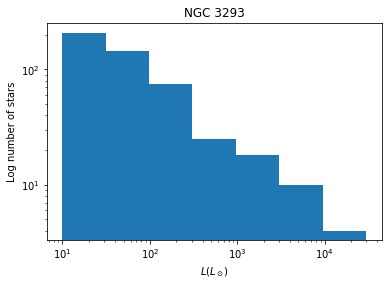

In [10]:
bins = np.logspace(np.log10(1),np.log10(30000),10)
bins = bins[2:]

plt.title('NGC 3293')
num, bins, patch = plt.hist(L,bins)
plt.ylabel('Log number of stars')
plt.xlabel('$L (L_\odot)$')
plt.xscale('log')
plt.yscale('log')
plt.show()

***Figure 3.*** Histogram of number of stars detected in NGC 3293 as a function of luminosity, in log-log space. We have only included stars that are sufficiently bright that we beleive we would have etected a considerable portion of these stars. A linear function in log-log space would likely be a good fit to this data.

Now we perform the fit, using log of the number of stars in each bin, and log of the luminosity for each bin. We take the average of the luminosity of the left and right edges as the luminosity for each bin.

In [11]:
# log of number of stars in each bin
log_stars = np.log10(num)

# log of luminosity using centre of each bin
log_lum = np.log10([(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)])

m,c = np.polyfit(log_lum,log_stars,1)
print('Slope = ', m)
print('Intercept = ', c)

Slope =  -0.5808484722362072
Intercept =  3.144182739335372


Since $\log(y) = m\log(x) + c = \log(x^m) + c$, we have $y = 10^{\log(x^m) + c} = 10^cx^m$. We will plot this on our histogram to check that the fit looks good.

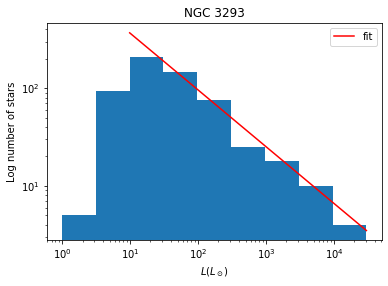

In [12]:
x = np.linspace(bins[0],bins[-1])
y = m*x + c

y2 = 10**c*x**m

bins = np.logspace(np.log10(1),np.log10(30000),10)

plt.title('NGC 3293')
num, bins, patch = plt.hist(L,bins)
plt.plot(x,y2,color='red',label='fit')
plt.ylabel('Log number of stars')
plt.xlabel('$L (L_\odot)$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

***Figure 4.*** Histogram of number of stars detected in NGC 3293 as a function of luminosity, in log-log space. A linear fit is used with slope -0.58 and intercept 3.1. Visually, this appears to be a good fit to the bright stars.

The fit looks good!